#ch09-How to Explore the GAN Latent Space When Generating Faces
- [ch09-How to Explore the GAN Latent Space When Generating Faces](https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/) by [Jason Brownlee](https://machinelearningmastery.com/author/jasonb/) on Sept 1, 2020 in [Generative Adversarial Networks](https://machinelearningmastery.com/category/generative-adversarial-networks/)
- Revised & Customized by Ivan HP Lin (WIP)

The generative model in the GAN architecture learns to map points in the latent space to generated images. The latent space has no meaning other than the meaning applied to it via the generative model. Yet, the latent space has structure that can be explored, such as by interpolating between points and performing vector arithmetic between points in latent space which have meaningful and targeted effects on the generated images.

In this tutorial, you will discover how to develop a generative adversarial network for face generation and explore the structure of latent space and the effect on generated faces.

After completing this tutorial, you will know:

* How to develop a generative adversarial network for generating faces.
* How to interpolate between points in latent space and generate images that morph from one face to another.
* How to perform vector arithmetic in latent space and achieve targeted results in the resulting generated faces.

#0.. Tutorial Overview

Vector Arithmetic in Latent Space
Large-Scale CelebFaces Dataset (CelebA)
How to Prepare CelebA Faces Dataset
How to Develop a Generative Adversarial Network
How to Explore the Latent Space for Generated Faces

In [ ]:
## To know if it is runing on colab
import sys
import os
from datetime import date
from datetime import datetime
import pytz

IN_COLAB = 'google.colab' in sys.modules

if (IN_COLAB):
  from google.colab import drive
  drive.mount('/gdrive')
  PROJ_DIR='/gdrive/MyDrive/00_AI.Garden/01_Github/252_ML.tutorial/ML_Mastery/GAN/'
  FOLDER_MODEL = PROJ_DIR + 'models/ch09/'
  FOLDER_PLOT = PROJ_DIR + 'plots/ch09/'
else:
  PROJ_DIR='./'
  FOLDER_MODEL = PROJ_DIR + 'models/ch09/'
  FOLDER_PLOT = PROJ_DIR + 'plots/ch09/'

os.makedirs(FOLDER_MODEL, exist_ok=True)
os.makedirs(FOLDER_PLOT, exist_ok=True)
print(f'folder for models @ {FOLDER_MODEL}')
print(f'folder for plots @ {FOLDER_PLOT}')

tz = pytz.timezone('Asia/Taipei')
today = date.today()
now = datetime.now(tz)

# dd/mm/YY H:M:S
dateCode = now.strftime("%Y%m%d_%H%M")
dateCodePostfix = dateCode
print("dateCodePostfix =", dateCodePostfix)	
dateCodePrefix = 'gan.ch09_'
print("dateCodePrefix =", dateCodePrefix)	

Mounted at /gdrive
folder for models @ /gdrive/MyDrive/00_AI.Garden/01_Github/252_ML.tutorial/ML_Mastery/GAN/models/ch09/
folder for plots @ /gdrive/MyDrive/00_AI.Garden/01_Github/252_ML.tutorial/ML_Mastery/GAN/plots/ch09/
dateCodePostfix = 20220605_2314
dateCodePrefix = gan.ch09_


##0.1 Kaggle dataSet download

In [ ]:
'''
def colabDownloadKaggleDataSet(dataSetName, \
                               kaggle_username='lin3372', kaggle_key='6864869e0f26f7cde2c8a93ca73b224c',\
                               gdrive_mnt_pt='/gdrive/',\
                               kaggle_dataset_colab_dir='/content/dataSet/', \
                               kaggle_json_file_src='/gdrive/MyDrive/00_AI.Garden/01_Github/util/kaggle/kaggle.json',\
                               kaggle_json_file_working_dir='/content/dataSet/kaggle.json'):
  import sys  
  import os
  import shutil
  import json
  !pip install kaggle

  IN_COLAB = 'google.colab' in sys.modules 

  if not IN_COLAB:
    print('Not in Colab, exit!')
    return

  #token = {"username":"lin3372","key":"6864869e0f26f7cde2c8a93ca73b224c"}
  token = {"username":kaggle_username,"key":kaggle_key}
  
  #GDRIVE_MOUNT_PT='/gdrive/'
  #KAGGLE_DATATSET_COLAB_DIR='/content/dataSet/'
  #KAGGLE_JSON_FILE_SRC=GDRIVE_MOUNT_PT + 'MyDrive/00_AI.Garden/01_Github/util/kaggle/kaggle.json'
  #KAGGLE_JSON_FILE_WORKING_DIR = KAGGLE_DATATSET_COLAB_DIR + 'kaggle.json'

  GDRIVE_MOUNT_PT = gdrive_mnt_pt
  KAGGLE_DATATSET_COLAB_DIR = kaggle_dataset_colab_dir
  KAGGLE_JSON_FILE_SRC = kaggle_json_file_src
  KAGGLE_JSON_FILE_WORKING_DIR = kaggle_json_file_working_dir

  #os.environ['KAGGLE_USERNAME']='lin3372'
  #os.environ['KAGGLE_KEY']='6864869e0f26f7cde2c8a93ca73b224c'
  os.environ['KAGGLE_USERNAME'] = kaggle_username
  os.environ['KAGGLE_KEY'] = kaggle_key  
  os.environ['KAGGLE_CONFIG_DIR'] = KAGGLE_DATATSET_COLAB_DIR  

  from google.colab import drive
  drive.mount(GDRIVE_MOUNT_PT) 

  from kaggle.api.kaggle_api_extended import KaggleApi
  api = KaggleApi()
  api.authenticate()

  os.makedirs(KAGGLE_DATATSET_COLAB_DIR, exist_ok=True)
  print(f'Creating dir @ {KAGGLE_DATATSET_COLAB_DIR}')
  shutil.copy2(KAGGLE_JSON_FILE_SRC, KAGGLE_DATATSET_COLAB_DIR)
  print(f'Copying kaggle.json from {KAGGLE_JSON_FILE_SRC} to {KAGGLE_DATATSET_COLAB_DIR}')
  os.chmod(KAGGLE_JSON_FILE_WORKING_DIR, 0o600)

  CURDIR=os.getcwd()
  os.chdir(KAGGLE_DATATSET_COLAB_DIR)

  with open(KAGGLE_JSON_FILE_WORKING_DIR, 'w') as file:
    json.dump(token, file)

  #!kaggle config set -n path -v{KAGGLE_DATATSET_COLAB_DIR} 

  print(f'dataSet = {dataSetName}')

  #!kaggle competitions download -c $dataSetName -p ./
  api.dataset_download_files(f'{dataSetName}', path=KAGGLE_DATATSET_COLAB_DIR)  
  #!kaggle datasets download -d $dataSetName  #jessicali9530/celeba-dataset

  os.chdir(CURDIR)

  return KAGGLE_DATATSET_COLAB_DIR
'''  

'\ndef colabDownloadKaggleDataSet(dataSetName,                                kaggle_username=\'lin3372\', kaggle_key=\'6864869e0f26f7cde2c8a93ca73b224c\',                               gdrive_mnt_pt=\'/gdrive/\',                               kaggle_dataset_colab_dir=\'/content/dataSet/\',                                kaggle_json_file_src=\'/gdrive/MyDrive/00_AI.Garden/01_Github/util/kaggle/kaggle.json\',                               kaggle_json_file_working_dir=\'/content/dataSet/kaggle.json\'):\n  import sys  \n  import os\n  import shutil\n  import json\n  !pip install kaggle\n\n  IN_COLAB = \'google.colab\' in sys.modules \n\n  if not IN_COLAB:\n    print(\'Not in Colab, exit!\')\n    return\n\n  #token = {"username":"lin3372","key":"6864869e0f26f7cde2c8a93ca73b224c"}\n  token = {"username":kaggle_username,"key":kaggle_key}\n  \n  #GDRIVE_MOUNT_PT=\'/gdrive/\'\n  #KAGGLE_DATATSET_COLAB_DIR=\'/content/dataSet/\'\n  #KAGGLE_JSON_FILE_SRC=GDRIVE_MOUNT_PT + \'MyDrive/00_AI.Garden/0

#1..Vector Arithmetic in Latent Space

The generator model in the GAN architecture takes a point from the latent space as input and generates a new image.

The latent space itself has no meaning. Typically it is a 100-dimensional hypersphere with each variable drawn from a Gaussian distribution with a mean of zero and a standard deviation of one. Through training, the generator learns to map points into the latent space with specific output images and this mapping will be different each time the model is trained.

The latent space has structure when interpreted by the generator model, and this structure can be queried and navigated for a given model.

Typically, new images are generated using random points in the latent space. 

A series of points can be created on a linear path between two points in the latent space, such as two generated images. These points can be used to generate a series of images that show a transition between the two generated images.

Finally, the points in the latent space can be kept and used in simple vector arithmetic to create new points in the latent space that, in turn, can be used to generate images. This is an interesting idea, as it allows for the intuitive and targeted generation of images.

The important 2015 paper by Alec Radford, et al. titled [“Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks”](https://arxiv.org/abs/1511.06434) introduced a stable model configuration for training deep convolutional neural network models as part of the GAN architecture.

In the paper, the authors explored the latent space for GANs fit on a number of different training datasets, most notably a dataset of celebrity faces. They demonstrated two interesting aspects.

The first was the vector arithmetic with faces. For example, a face of a smiling woman minus the face of a neutral woman plus the face of a neutral man resulted in the face of a smiling man.

``` smiling woman - neutral woman + neutral man = smiling man ```
<figure><center>
<img src="https://machinelearningmastery.com/wp-content/uploads/2019/05/Example-of-Vector-Arithmetic-on-Points-in-the-Latent-Space-for-Generating-Faces-with-a-GAN.png" width="80%">
<figcaption>Example of Vector Arithmetic on Points in the Latent Space for Generating Faces With a GAN. </figcaption> 
<figcaption> (Taken from Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks.)</figcaption>
</center></figure>

The second demonstration was the transition between two generated faces, specifically by creating a linear path through the latent dimension between the points that generated two faces and then generating all of the faces for the points along the path.

<figure><center>
<img src="https://machinelearningmastery.com/wp-content/uploads/2019/05/Example-of-Faces-on-a-Path-Between-Two-GAN-Generated-Faces.png" width="80%">
<figcaption>Example of Faces on a Path Between Two GAN Generated Faces. </figcaption> 
<figcaption>(Taken from Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks.)</figcaption>
</center></figure>

Exploring the structure of the latent space for a GAN model is both interesting for the problem domain and helps to develop an intuition for what has been learned by the generator model.

In this tutorial, we will develop a GAN for generating photos of faces, then explore the latent space for the model with vector arithmetic.

#2.. Large-Scale CelebFaces Dataset (CelebA)

The first step is to select a dataset of faces.

In this tutorial, we will use the [Large-scale CelebFaces Attributes Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html), referred to as **CelebA**. This dataset was developed and published by Ziwei Liu, et al. for their 2015 paper titled [“From Facial Parts Responses to Face Detection: A Deep Learning Approach.”](https://arxiv.org/abs/1509.06451)

The dataset provides about 200,000 photographs of celebrity faces along with annotations for what appears in given photos, such as glasses, face shape, hats, hair type, etc. As part of the dataset, the authors provide a version of each photo centered on the face and cropped to the portrait with varying sizes around $150$ pixels wide and $200$ pixels tall. We will use this as the basis for developing our GAN model.

The dataset can be easily downloaded from the Kaggle webpage. Note: this may require an account with Kaggle.

- [CelebFaces Attributes (CelebA) Dataset](https://www.kaggle.com/jessicali9530/celeba-dataset)

Specifically, download the file “***img_align_celeba.zip***” which is about $1.3$ gigabytes. To do this, click on the filename on the Kaggle website and then click the download icon.  After downloading, unzip the archive.  Another way to download the celebA dataset is to download from [Google Drive mainstinaed by HKUST](https://drive.google.com/drive/folders/0B7EVK8r0v71pTUZsaXdaSnZBZzg?resourcekey=0-rJlzl934LzC-Xp28GeIBzQ)

This will create a new directory named “***img_align_celeba***” that contains all of the images with filenames like 202599.jpg and 202598.jpg.

Next, we can look at preparing the raw images for modeling.

In [ ]:
import os
import shutil
import zipfile

shutil.copy2('/gdrive/MyDrive/00_AI.Garden/01_Github/util/datasetdownload.py','./')
from datasetdownload import colabDownloadKaggleDataSet

dirDataSet = colabDownloadKaggleDataSet(dataSetName='jessicali9530/celeba-dataset')

with zipfile.ZipFile(dirDataSet + 'celeba-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(dirDataSet)

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
Creating dir @ /content/dataSet/
Copying kaggle.json from /gdrive/MyDrive/00_AI.Garden/01_Github/util/kaggle/kaggle.json to /content/dataSet/
dataSet = jessicali9530/celeba-dataset


#3.. How to Prepare CelebA Faces Dataset

The first step is to develop code to load the images.

We can use the [Pillow library](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/) to load a given image file, convert it to RGB format (if needed) and return an array of pixel data. The **```load_image()```** function below implements this.

In [ ]:
# load an image as an rgb numpy array
def load_image(filename):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	return pixels

Next, we can enumerate the directory of images, load each as an array of pixels in turn, and return an array with all of the images.

There are 200K images in the dataset, which is probably more than we need so we can also limit the number of images to load with an argument. The ***```load_faces()```*** function below implements this.

In [ ]:
# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# load the image
		pixels = load_image(directory + filename)
		# store
		faces.append(pixels)
		# stop once we have enough
		if len(faces) >= n_faces:
			break
	return asarray(faces)

Finally, once the images are loaded, we can plot them using the ```imshow()``` function from the matplotlib library.

The ```plot_faces()``` function below does this, plotting images arranged into in a square.

In [ ]:
# plot a list of loaded faces
def plot_faces(faces, n):
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(faces[i])
	pyplot.show()

The complete example listed below:

Loaded:  (49, 218, 178, 3)


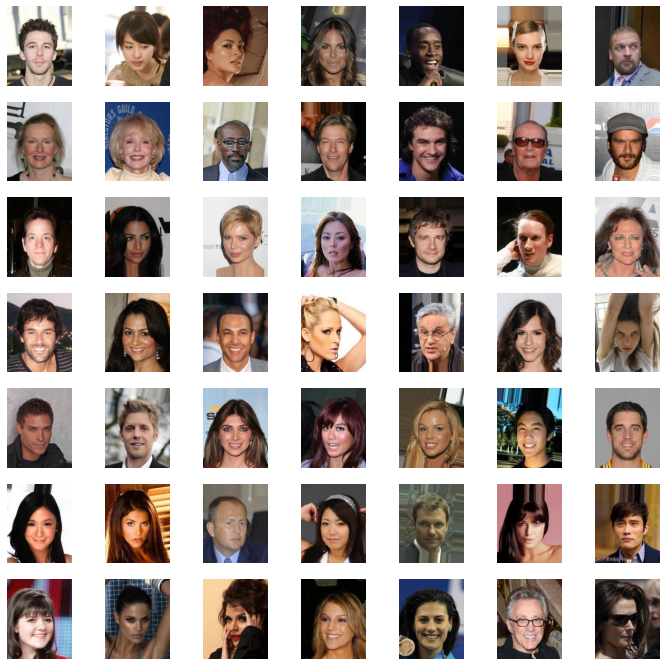

In [ ]:
# load and plot faces
from os import listdir
from numpy import asarray
from PIL import Image
from matplotlib import pyplot

# load an image as an rgb numpy array
def load_image(filename):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	return pixels

# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# load the image
		pixels = load_image(directory + filename)
		# store
		faces.append(pixels)
		# stop once we have enough
		if len(faces) >= n_faces:
			break
	return asarray(faces)

# plot a list of loaded faces
def plot_faces(faces, n):
  pyplot.figure(figsize=(12,12))
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(faces[i])
  pyplot.show()

# directory that contains all images
directory = dirDataSet + 'img_align_celeba/img_align_celeba/'
# load and extract all faces
faces = load_faces(directory, 49)
print('Loaded: ', faces.shape)
# plot faces
plot_faces(faces, 7)

## **```MTCNN```** for face detection and alignment

When working with a GAN, it is easier to model a dataset if all of the images are small and square in shape.

Further, as we are only interested in the face in each photo, and not the background, we can perform face detection and extract only the face before resizing the result to a fixed size.

There are many ways to perform face detection. In this case, we will use a pre-trained Multi-Task Cascaded Convolutional Neural Network, or MTCNN. This is a state-of-the-art deep learning model for face detection, described in the 2016 paper titled “[Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.](https://arxiv.org/abs/1604.02878)”

We will use the implementation provided by Iván de Paz Centeno in the [ipazc/mtcnn project](https://github.com/ipazc/mtcnn). This library can be installed via pip as follows:

In [ ]:
!pip install mtcnn

# confirm mtcnn was installed correctly
import mtcnn
# print version
print(f'mtcnn version = {mtcnn.__version__}')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 37.3 MB/s 
mtcnn version = 0.1.0


The MTCNN model is very easy to use.

First, an instance of the MTCNN model is created, then the ```detect_faces()``` function can be called passing in the pixel data for one image. The result is a list of detected faces, with a bounding box defined in pixel offset values.

```
...
# prepare model
model = MTCNN()
# detect face in the image
faces = model.detect_faces(pixels)
# extract details of the face
x1, y1, width, height = faces[0]['box']

```

We can update our example to extract the face from each loaded photo and resize the extracted face pixels to a fixed size. In this case, we will use the square shape of 80×80 pixels.

The ```extract_face()``` function below implements this, taking the MTCNN model and pixel values for a single photograph as arguments and returning an $80 \times 80 \times 3$ array of pixel values with just the face, or None if no face was detected (which can happen rarely).

In [ ]:
# extract the face from a loaded image and resize
def extract_face(model, pixels, required_size=(80, 80)):
	# detect face in the image
	faces = model.detect_faces(pixels)
	# skip cases where we could not detect a face
	if len(faces) == 0:
		return None
	# extract details of the face
	x1, y1, width, height = faces[0]['box']
	# force detected pixel values to be positive (bug fix)
	x1, y1 = abs(x1), abs(y1)
	# convert into coordinates
	x2, y2 = x1 + width, y1 + height
	# retrieve face pixels
	face_pixels = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face_pixels)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

We can now update the ```load_faces()``` function to extract the face from the loaded photo and store that in the list of faces returned.



In [ ]:
# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
	# prepare model
	model = MTCNN()
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# load the image
		pixels = load_image(directory + filename)
		# get face
		face = extract_face(model, pixels)
		if face is None:
			continue
		# store
		faces.append(face)
		print(len(faces), face.shape)
		# stop once we have enough
		if len(faces) >= n_faces:
			break
	return asarray(faces)

Tying this together, the complete example is listed below.

In this case, we increase the total number of loaded faces to $50,000$ to provide a good training dataset for our GAN model.

In [ ]:
# example of extracting and resizing faces into a new dataset
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot

# load an image as an rgb numpy array
def load_image(filename):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	return pixels

# extract the face from a loaded image and resize
def extract_face(model, pixels, required_size=(80, 80)):
	# detect face in the image
	faces = model.detect_faces(pixels)
	# skip cases where we could not detect a face
	if len(faces) == 0:
		return None
	# extract details of the face
	x1, y1, width, height = faces[0]['box']
	# force detected pixel values to be positive (bug fix)
	x1, y1 = abs(x1), abs(y1)
	# convert into coordinates
	x2, y2 = x1 + width, y1 + height
	# retrieve face pixels
	face_pixels = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face_pixels)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
  # prepare model
  model = MTCNN()
  faces = list()
  # enumerate files
  for filename in listdir(directory):
    # load the image
    pixels = load_image(directory + filename)
    # get face
    face = extract_face(model, pixels)
    if face is None:
      continue
    # store
    faces.append(face)
    if (len(faces) % 20 == 0):
      print(f'num_faces:{len(faces)}, {face.shape}')
    # stop once we have enough
    if len(faces) >= n_faces:
      break
  return asarray(faces)

# directory that contains all images
directory = dirDataSet + 'img_align_celeba/img_align_celeba/'
# load and extract all faces
all_faces = load_faces(directory, 50000)
print('Loaded: ', faces.shape)
# save in compressed format
savez_compressed('img_align_celeba.npz', all_faces)

num_faces:20, (80, 80, 3)
num_faces:40, (80, 80, 3)
num_faces:60, (80, 80, 3)
num_faces:80, (80, 80, 3)
num_faces:100, (80, 80, 3)
num_faces:120, (80, 80, 3)
num_faces:140, (80, 80, 3)
num_faces:160, (80, 80, 3)
num_faces:180, (80, 80, 3)
num_faces:200, (80, 80, 3)
num_faces:220, (80, 80, 3)
num_faces:240, (80, 80, 3)
num_faces:260, (80, 80, 3)
num_faces:280, (80, 80, 3)
num_faces:300, (80, 80, 3)
num_faces:320, (80, 80, 3)
num_faces:340, (80, 80, 3)
num_faces:360, (80, 80, 3)
num_faces:380, (80, 80, 3)
num_faces:400, (80, 80, 3)
num_faces:420, (80, 80, 3)
num_faces:440, (80, 80, 3)
num_faces:460, (80, 80, 3)
num_faces:480, (80, 80, 3)
num_faces:500, (80, 80, 3)
num_faces:520, (80, 80, 3)
num_faces:540, (80, 80, 3)
num_faces:560, (80, 80, 3)
num_faces:580, (80, 80, 3)
num_faces:600, (80, 80, 3)
num_faces:620, (80, 80, 3)
num_faces:640, (80, 80, 3)
num_faces:660, (80, 80, 3)
num_faces:680, (80, 80, 3)
num_faces:700, (80, 80, 3)
num_faces:720, (80, 80, 3)
num_faces:740, (80, 80, 3)
num_f

Running the example may take a few minutes given the larger number of faces to be loaded.

At the end of the run, the array of extracted and resized faces is saved as a compressed NumPy array with the filename ```‘img_align_celeba.npz‘```.

The prepared dataset can then be loaded any time, as follows.
```
# load the prepared dataset
from numpy import load
# load the face dataset
data = load('img_align_celeba.npz')
faces = data['arr_0']
print('Loaded: ', faces.shape)
```

#4.. How to Develop a Generative Adversarial Network


## Discirminator ($D$) model definition

The first step is to define the models.

The discriminator model takes as input one $80 \times 80$ color image an outputs a binary prediction as to whether the image is real (class=1) or fake (class=0). It is implemented as a modest convolutional neural network using best practices for GAN design such as using the [LeakyReLU activation function](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) with a slope of $0.2$, using a [2×2 stride to downsample](https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/), and the [adam version of stochastic gradient descent](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) with a learning rate of $0.0002$ and a momentum of $0.5$

The **```define_discriminator()```** function below implements this, defining and compiling the discriminator model and returning it. The input shape of the image is parameterized as a default function argument in case you want to re-use the function for your own image data later.

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(80,80,3)):
  model = Sequential()
  # normal
  model.add(Conv2D(128, (5,5), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  # downsample to 40x40
  model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample to 20x30
  model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample to 10x10
  model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample to 5x5
  model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # classifier
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

## Generator ($G$) model definition

The generator model takes as input a point in the latent space and outputs a single $80 \times 80$ color image.

This is achieved by using a fully connected layer to interpret the point in the latent space and provide sufficient activations that can be reshaped into many copies (in this case $128$) of a low-resolution version of the output image (e.g. $5 \times 5$). This is then upsampled four times, doubling the size and quadrupling the area of the activations each time using transpose convolutional layers. The model uses best practices such as the LeakyReLU activation, a kernel size that is a factor of the stride size, and a hyperbolic tangent ($tanh$) activation function in the output layer.

The **```define_generator()```** function below defines the generator model but intentionally does not compile it as it is not trained directly, then returns the model. The size of the latent space is parameterized as a function argument.

In [ ]:
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 5x5 feature maps
	n_nodes = 128 * 5 * 5
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((5, 5, 128)))
	# upsample to 10x10
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 20x20
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 40x40
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 80x80
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer 80x80x3
	model.add(Conv2D(3, (5,5), activation='tanh', padding='same'))
	return model

## Gan ($GAN$) model definition

Next, a GAN model can be defined that combines both the generator model ($G$) and the discriminator model ($D$) into one larger model. 
* This larger model will be used to train the model weights in the generator $(G)$, using the output and error calculated by the discriminator model $(D)$. 
* The discriminator model $(D)$ is trained separately, and as such, the model weights are marked as not trainable in this larger GAN model to ensure that only the weights of the generator model are updated. 
* This change to the trainability of the discriminator weights only has an effect when training the combined GAN model, not when training the discriminator standalone.

This larger GAN model takes as input a point in the latent space, uses the generator model to generate an image, which is fed as input to the discriminator model, then output or classified as real or fake.

The **```define_gan()```** function below implements this, taking the already-defined generator and discriminator models as input.

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

## Training the GAN model

Now that we have defined the GAN model, we need to train it. But, before we can train the model, we require input data.

### Load and scale the data

The first step is to load and scale the pre-processed faces dataset. The saved NumPy array can be loaded, as we did in the previous section, then the [pixel values must be scaled](https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/) to the range $[-1,1]$ to match the output of the generator model.

The **```load_real_samples()```** function below implements this, returning the loaded and scaled image data ready for modeling.

In [ ]:
# load and prepare training images
def load_real_samples():
	# load the face dataset
	data = load('img_align_celeba.npz')
	X = data['arr_0']
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

We will require one batch (or a half) batch of real images from the dataset each update to the GAN model. A simple way to achieve this is to select a random sample of images from the dataset each time.

The **```generate_real_samples()```** function below implements this, taking the prepared dataset as an argument, selecting and returning a random sample of face images and their corresponding class label for the discriminator, specifically class=1, indicating that they are real images.

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

Next, we need inputs for the generator model. These are random points from the latent space, specifically [Gaussian distributed random variables](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/).

The **```generate_latent_points()```** function implements this, taking the size of the latent space as an argument and the number of points required and returning them as a batch of input samples for the generator model.

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

Next, we need to use the points in the latent space as input to the generator in order to generate new images.

The **```generate_fake_samples()```** function below implements this, taking the generator model and size of the latent space as arguments, then generating points in the latent space and using them as input to the generator model. The function returns the generated images and their corresponding class label for the discriminator model, specifically class=$0$ to indicate they are fake or generated.

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

We are now ready to fit the GAN models.

The model is fit for $100$ training epochs, which is arbitrary, as the model begins generating plausible faces after perhaps the first few epochs. A batch size of 128 samples is used, and each training epoch involves $50000 \over 128$ or about $390$ batches of real and fake samples and updates to the model.

1. First, the discriminator model $(D)$ is updated for a half batch of real samples, then a half batch of fake samples, together forming one batch of weight updates. 
2. The generator $(G)$ is then updated via the combined GAN model. **Importantly, the class label is set to 1 or real for the fake samples. This has the effect of updating the generator toward getting better at generating real samples on the next batch**.

The **```train()```** function below implements this, taking the defined models, dataset, and size of the latent dimension as arguments and parameterizing the number of epochs and batch size with default arguments.

In [1]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

There is currently no reliable way to automatically evaluate the quality of generated images. Therefore, we must generate images periodically during training and save the model at these times. This both provides a check-point that we can later load and use to generate images, and a way to safeguard against the training process failing, which can happen.

Below defines the ```summarize_performance()``` and ```save_plot()``` functions.

The ```summarize_performance()``` function generates samples and evaluates the performance of the discriminator $(D)$ on real and fake samples. The classification accuracy is reported and might provide insight into model performance. The ```save_plot()``` is called to create and save a plot of the generated images, and then the model is saved to a file.

In [ ]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=10):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

We can then define the size of the latent space, define all three models, and train them on the loaded face dataset.

```
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)
```

Tying all of this together, the complete example is listed below.

In [2]:
# example of a gan for generating faces
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(in_shape=(80,80,3)):
	model = Sequential()
	# normal
	model.add(Conv2D(128, (5,5), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample to 40x40
	model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample to 20x30
	model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample to 10x10
	model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample to 5x5
	model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 5x5 feature maps
	n_nodes = 128 * 5 * 5
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((5, 5, 128)))
	# upsample to 10x10
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 20x20
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 40x40
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 80x80
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer 80x80x3
	model.add(Conv2D(3, (5,5), activation='tanh', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load and prepare training images
def load_real_samples():
	# load the face dataset
	data = load('img_align_celeba.npz')
	X = data['arr_0']
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# create and save a plot of generated images
def save_plot(examples, epoch, n=10):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


FileNotFoundError: ignored

#5.. How to Explore the Latent Space for Generated Faces

# Reference

* [How to Use the Kaggle API in Python](https://python.plainenglish.io/how-to-use-the-kaggle-api-in-python-4d4c812c39c7)